In [1]:
import os
import pandas as pd
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

### Inputs

In [2]:
# Read  prms ET
prms = pd.read_csv('./nhru_summary.csvhru_actet.csv',delimiter=',',index_col=0)

In [3]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/PRMS_corrected_shapefile.shp')

### Read MODIS


In [4]:
# Directory containing CSV files
directory = "C:/Users/Paul Coderre/Documents/Thesis/Validation/prms_mean/MOD16A3GF.061"

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(directory, '*.csv'))

In [5]:
# Iterate through each CSV file in the directory
for file_name in csv_files[:]:  # Make a copy of the list to iterate over
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_name, index_col=0)
    
    # Extract the index and column name from the file name
    index_name = os.path.splitext(os.path.basename(file_name))[0]
    
    # If merged_df is empty, directly assign df to it
    if merged_df is None:
        merged_df = df
    else:
        # Merge only the first column of df with merged_df based on the index
        merged_df[index_name] = df.iloc[:, 0]
    
    # Remove the processed file from the list
    csv_files.remove(file_name)

In [6]:
# Rename columns to year
new_columns = {}
for column in merged_df.columns:
    year = column.split('_')[-1]  # Extract year from column name
    new_columns[column] = int(year)  # Convert year to integer and assign as new column name
merged_df.rename(columns=new_columns, inplace=True)

In [7]:
# Sort DataFrame by column names (years)
merged_df = merged_df.sort_index(axis=1)

In [8]:
# Multiply every value in the DataFrame by 0.1
obs_scaled = merged_df * 0.1

In [9]:
obs_scaled

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
nhm_id,,,,,,,,,,,,,,,
95965,650.444775,668.081152,663.399463,693.243408,683.947900,651.767041,630.709277,662.210254,667.182324,695.553174,695.717578,672.378223,657.762158,683.948682,626.102686
95966,755.304639,768.458691,770.614893,791.208252,783.191016,766.613770,735.335742,755.082324,759.342334,778.098779,780.455469,767.900049,751.094238,778.210742,717.716064
95968,422.760352,424.171240,430.771143,472.605176,459.902734,433.356348,415.474609,434.910303,439.371973,468.725586,465.019873,449.279443,428.425732,457.425830,404.953857
95969,408.382227,428.819678,424.328174,487.524902,457.080566,409.748193,395.855469,427.044678,434.973779,475.585889,465.281982,440.381885,412.107178,455.414795,384.581885
95970,519.244092,548.139404,530.642139,566.240381,559.685938,520.952637,502.834717,529.807813,529.141504,553.759912,559.908350,539.063135,511.926416,544.361572,485.709082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96139,349.914331,476.891113,425.842139,452.027881,476.887793,479.073340,441.287109,491.293750,454.897314,473.325342,484.128467,503.969775,493.138525,515.958057,470.034619
96959,295.801343,382.630981,354.899609,358.825781,391.657056,376.893555,324.612598,355.502173,366.583960,387.257324,391.236230,364.892358,383.999438,400.586035,349.269482
96978,295.967651,379.625659,367.076611,367.323730,388.234668,385.454761,349.248047,369.814990,372.906226,387.074536,392.982520,371.243457,392.218701,394.224390,357.208521


In [10]:
# Extract two columns from GeoDataFrame to create a renaming key
renaming_key = gdf[['nhm_id', 'model_hru_']]

In [11]:
# Set 'nhm_id' as the index in renaming key DataFrame
renaming_key.set_index('nhm_id', inplace=True)

In [12]:
# Rename index values in DataFrame using the renaming key
obs_scaled.index = obs_scaled.index.map(renaming_key['model_hru_'])

In [13]:
# Convert index to integers
obs_scaled.index = obs_scaled.index.astype(int)

# Sort index in ascending order
obs_scaled = obs_scaled.sort_index()

In [14]:
obs_scaled = obs_scaled.transpose()

In [15]:
# Remove index title
obs_scaled.index.name = None

In [16]:
# Convert column headers to integers
obs_scaled.columns = obs_scaled.columns.astype(int)

In [17]:
obs_scaled

nhm_id,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,650.444775,755.304639,422.760352,408.382227,519.244092,405.405371,398.155640,737.407764,429.525586,1069.089941,...,207.985107,214.454395,222.518750,231.627246,233.883472,229.218457,234.289844,239.893140,325.126611,332.379932
2002,668.081152,768.458691,424.171240,428.819678,548.139404,444.454834,434.445410,764.452295,452.005908,1099.782813,...,311.033862,324.719604,325.680859,332.013550,333.409619,346.960815,346.172388,341.544458,417.828809,421.797021
2003,663.399463,770.614893,430.771143,424.328174,530.642139,421.768164,419.525098,740.848047,449.568555,1087.782422,...,250.908496,262.224561,276.733740,284.634668,285.463794,295.277930,298.545728,298.564233,384.601978,386.404639
2004,693.243408,791.208252,472.605176,487.524902,566.240381,456.133350,427.235156,758.633350,471.358594,1088.180371,...,274.925146,287.770947,300.685840,310.019727,314.057495,316.325317,323.842651,323.797461,397.790991,391.948511
2005,683.947900,783.191016,459.902734,457.080566,559.685938,451.202051,434.458594,767.169775,471.478857,1098.616797,...,268.401807,286.779126,305.621924,319.705298,325.085474,326.991577,336.201367,333.540112,407.424023,409.964600
2006,651.767041,766.613770,433.356348,409.748193,520.952637,430.338770,427.578320,755.345996,446.004102,1105.648145,...,265.647632,277.549048,289.171069,301.690845,303.632300,314.368604,316.706934,316.456787,404.184082,410.757129
2007,630.709277,735.335742,415.474609,395.855469,502.834717,416.783545,425.617432,716.683789,430.030469,1097.123242,...,275.385498,295.873022,298.930957,304.349805,307.087476,304.231104,329.585596,329.207471,435.151318,432.642041
2008,662.210254,755.082324,434.910303,427.044678,529.807813,436.439404,415.717480,740.125635,450.738965,1115.983789,...,263.789966,280.141553,285.761108,299.090845,302.551904,299.706250,316.503442,320.034155,405.509473,400.572021
2009,667.182324,759.342334,439.371973,434.973779,529.141504,430.426318,428.080908,741.537598,454.693750,1114.760937,...,259.413037,278.105566,285.372461,297.982837,304.725000,309.342041,316.013159,319.030249,389.656519,392.216309
2010,695.553174,778.098779,468.725586,475.585889,553.759912,461.995801,445.713916,769.229004,469.336035,1111.450488,...,286.356079,302.399365,323.268994,338.982300,343.870947,348.870435,357.816040,358.516772,423.555811,423.210986


### Analysis

In [18]:
# Convert index to datetime format
prms.index = pd.to_datetime(prms.index)

# Trim dataframe to include only data from 2001 to 2015
prms = prms['2001':'2015']

In [19]:
# Convert index to datetime
prms.index = pd.to_datetime(prms.index)

# Resample to yearly by summing
prms = prms.resample('Y').sum()

In [20]:
# convert PRMS from inches to mm
prms= prms * 25.4

In [21]:
# Convert index to datetime
prms.index = pd.to_datetime(prms.index)

# Extract year from datetime index and convert it to integer
prms.index = prms.index.year.astype(int)

In [22]:
# Remove index title
prms.index.name = None

In [23]:
# Convert column headers to integers
prms.columns = prms.columns.astype(int)

In [24]:
prms

,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,306.107535,361.007762,472.605733,362.747859,423.379189,395.932502,334.918450,356.524082,401.549684,303.208998,...,183.223741,172.751133,170.074468,178.916993,201.981570,198.068728,251.535819,237.191177,411.162249,354.907416
2002,356.708056,401.202601,514.090321,467.645775,480.065568,394.141674,394.333088,375.987627,429.202872,466.677591,...,332.640506,302.067719,316.959712,289.611168,398.821366,373.691633,442.457916,412.002303,622.772216,525.721933
2003,314.213307,385.474413,497.577835,420.248061,425.273221,413.058223,357.350072,286.084548,443.004537,296.206053,...,267.568756,261.235777,255.128446,234.265066,301.236083,312.297839,399.743701,363.429240,528.684919,450.807430
2004,355.339065,491.325027,541.208983,551.873290,497.059595,417.396718,443.696969,380.662051,459.915708,393.678965,...,330.079088,305.867244,282.719854,299.300730,423.867674,392.358169,459.290877,443.553439,617.593136,508.115065
2005,309.319388,462.066640,503.681799,419.339197,446.242854,394.006797,441.790219,455.511015,388.006106,357.639651,...,233.323140,258.432043,283.077991,269.219733,360.007162,343.033914,456.116439,392.176038,584.511125,517.954440
2006,312.890062,398.133824,510.302866,439.998937,435.624808,418.111659,371.788396,399.039770,422.930177,320.509524,...,150.083164,143.041289,161.001527,170.875310,203.860502,205.060601,298.128157,266.100001,489.093942,405.516994
2007,323.138996,462.154778,562.646913,447.120264,480.306456,435.750176,365.142000,407.090696,441.623599,304.111886,...,227.321237,226.978578,231.098570,215.752665,281.197388,256.121294,359.184829,342.322008,506.912484,461.457271
2008,357.985196,436.139107,546.047632,467.195613,449.704015,408.589798,351.889928,387.957172,454.668844,330.368247,...,274.440472,292.844271,304.197786,305.059512,346.092711,337.599157,420.802232,371.244398,541.260093,463.029173
2009,370.841354,436.409770,514.020656,426.140612,444.436815,422.501796,425.361517,447.438379,459.358658,452.749399,...,373.723957,272.895139,279.681607,278.661404,460.660095,442.503959,521.401065,482.346927,606.047005,522.417424
2010,358.012936,443.728704,547.147593,495.098187,479.216471,395.356556,421.030921,450.494159,448.807043,308.788849,...,440.383168,329.920857,330.983946,336.449005,485.877578,460.880003,508.742975,480.457833,583.781436,481.659057


In [25]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= prms - obs_scaled

In [26]:
difference

,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2001,-344.337241,-394.296877,49.845381,-45.634367,-95.864903,-9.472869,-63.237189,-380.883682,-27.975902,-765.880944,...,-24.761367,-41.703262,-52.444282,-52.710253,-31.901902,-31.149729,17.245975,-2.701963,86.035637,22.527484
2002,-311.373097,-367.256090,89.919081,38.826098,-68.073837,-50.313160,-40.112322,-388.464668,-22.803036,-633.105222,...,21.606643,-22.651885,-8.721148,-42.402382,65.411747,26.730817,96.285529,70.457845,204.943408,103.924912
2003,-349.186156,-385.140479,66.806692,-4.080112,-105.368918,-8.709941,-62.175026,-454.763498,-6.564018,-791.576369,...,16.660260,-0.988784,-21.605294,-50.369602,15.772289,17.019909,101.197974,64.865007,144.082942,64.402791
2004,-337.904343,-299.883225,68.603807,64.348388,-69.180786,-38.736631,16.461813,-377.971299,-11.442886,-694.501406,...,55.153942,18.096297,-17.965986,-10.718997,109.810179,76.032851,135.448226,119.755978,219.802145,116.166554
2005,-374.628513,-321.124376,43.779064,-37.741370,-113.443083,-57.195254,7.331625,-311.658760,-83.472752,-740.977146,...,-35.078666,-28.347083,-22.543933,-50.485565,34.921688,16.042337,119.915071,58.635926,177.087101,107.989841
2006,-338.876979,-368.479946,76.946518,30.250743,-85.327829,-12.227111,-55.789924,-356.306226,-23.073925,-785.138620,...,-115.564467,-134.507759,-128.169542,-130.815535,-99.771798,-109.308003,-18.578777,-50.356786,84.909860,-5.240135
2007,-307.570281,-273.180964,147.172303,51.264795,-22.528261,18.966631,-60.475431,-309.593093,11.593130,-793.011356,...,-48.064261,-68.894444,-67.832387,-88.597140,-25.890088,-48.109810,29.599233,13.114537,71.761165,28.815230
2008,-304.225058,-318.943217,111.137329,40.150935,-80.103797,-27.849607,-63.827553,-352.168463,3.929879,-785.615542,...,10.650506,12.702718,18.436678,5.968667,43.540807,37.892907,104.298789,51.210243,135.750621,62.457152
2009,-296.340970,-322.932564,74.648684,-8.833167,-84.704689,-7.924523,-2.719392,-294.099218,4.664908,-662.011538,...,114.310920,-5.210428,-5.690854,-19.321433,155.935095,133.161918,205.387906,163.316678,216.390486,130.201115
2010,-337.540238,-334.370076,78.422007,19.512298,-74.543441,-66.639245,-24.682995,-318.734845,-20.528992,-802.661639,...,154.027089,27.521491,7.714951,-2.533295,142.006631,112.009568,150.926935,121.941060,160.225625,58.448071


In [27]:
mean_annual_difference= difference.mean()

In [28]:
# Convert difference Series to a DataFrame
mean_annual_difference_df = pd.DataFrame(mean_annual_difference, columns=['Mean'])

In [29]:
mean_annual_difference_df.max()

Mean    314.063262
dtype: float64

In [30]:
mean_annual_difference_df.min()

Mean   -5961.805581
dtype: float64

In [31]:
mean_annual_difference_df.mean()

Mean   -35.725639
dtype: float64

In [32]:
mean_annual_difference_df.median()

Mean    5.219281
dtype: float64

In [33]:
# Find the index of the minimum value
min_index=mean_annual_difference_df.idxmin()
min_index

Mean    277
dtype: int64

In [34]:
# Calculate Q1, Q3, and IQR
Q1 = mean_annual_difference_df['Mean'].quantile(0.25)
Q3 = mean_annual_difference_df['Mean'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

# Find outliers
outliers = mean_annual_difference_df[(mean_annual_difference_df['Mean'] < lower_bound) | (mean_annual_difference_df['Mean'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print('Max outlier:', outliers.max())
print('Min outlier:', outliers.min())
print("Number of outliers:", outliers.shape[0])
print("Outliers:")
print(outliers)

Lower Bound: -758.3928737451995
Upper Bound: 769.4593937946352
Max outlier: Mean   -914.768997
dtype: float64
Min outlier: Mean   -5961.805581
dtype: float64
Number of outliers: 12
Outliers:
            Mean
11  -1675.379818
13  -2080.904292
277 -5961.805581
327 -1185.192720
329 -1830.463272
344  -914.768997
797 -5912.170686
799  -980.128125
800 -1292.986091
804 -1376.069403
806 -1852.626633
830 -2502.354401


In [35]:
# Replace outliers with NaN
mean_annual_difference_df.loc[(mean_annual_difference_df['Mean'] < lower_bound) | (mean_annual_difference_df['Mean'] > upper_bound), 'Mean'] = np.nan

### Plot heatmap

In [36]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(mean_annual_difference_df, left_on='model_hru_', right_index=True)

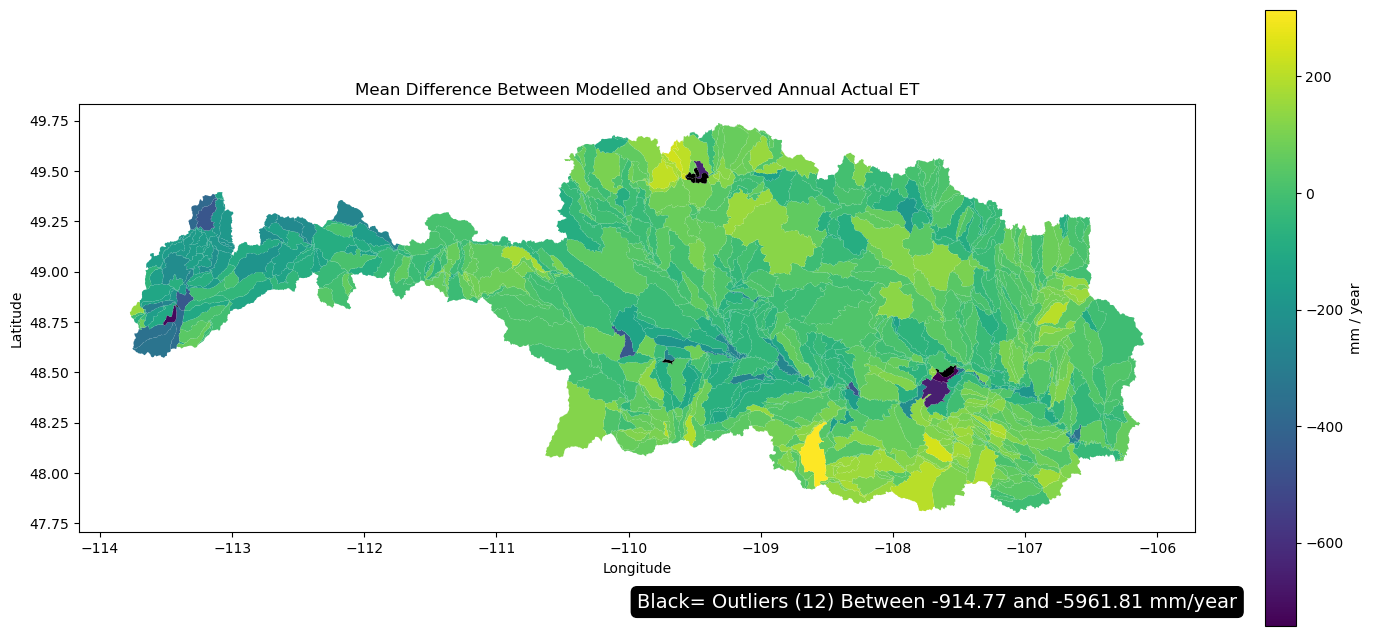

In [37]:
nan_color = 'black'  

# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8),missing_kwds={'color': nan_color})

# Add title to the plot
ax.set_title('Mean Difference Between Modelled and Observed Annual Actual ET')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('mm / year')

# Manually draw a black box with text to represent NaN values
ax.text(0.5, -0.175, 'Black= Outliers (12) Between -914.77 and -5961.81 mm/year', transform=ax.transAxes, color='white', fontsize=14,
        bbox=dict(facecolor='black', alpha=1, boxstyle='round,pad=0.3'))

# Add units for lat and lon (assuming you want to annotate the axes)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the plot as PNG to a specific location
plt.savefig('./prms_et.png')

# Show the plot
plt.show()

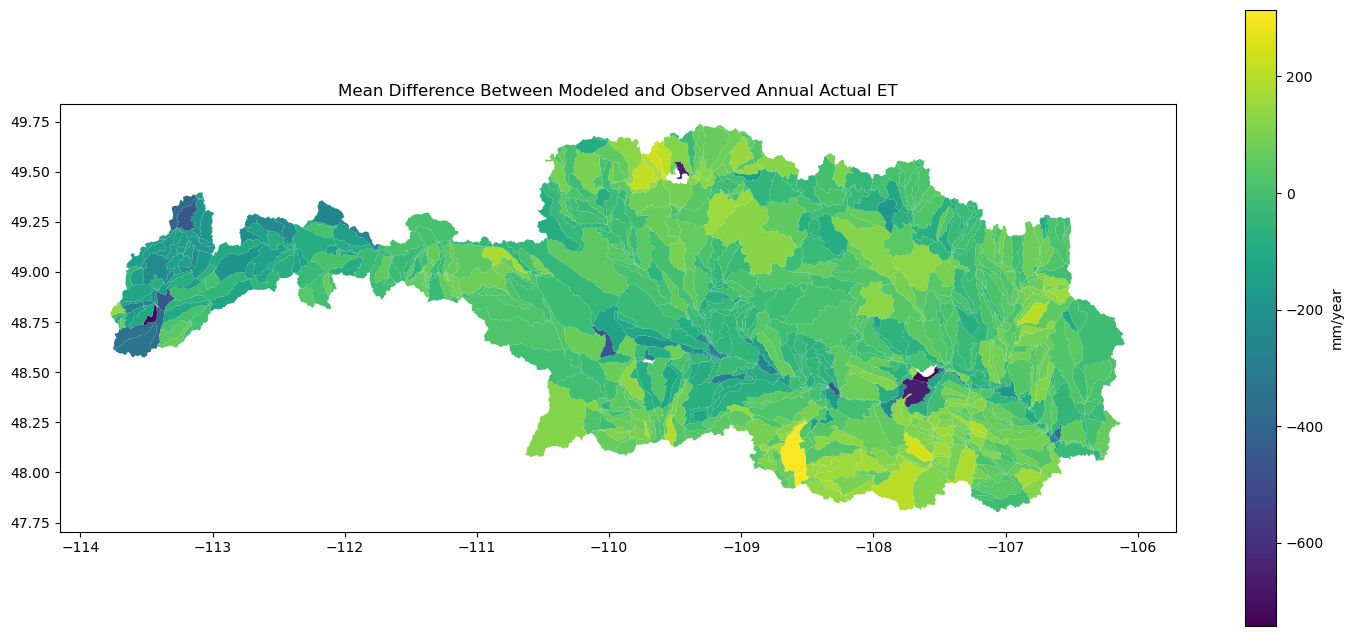

In [38]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8))

# Add title to the plot
ax.set_title('Mean Difference Between Modeled and Observed Annual Actual ET')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('mm/year')

# Save the plot as PNG to a specific location
plt.savefig('../../model/plots/et.png')

# Show the plot
plt.show()